In [12]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Install the ultralytics package using pip
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.4/709.4 kB 9.5 MB/s eta 0:00:00


In [13]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

In [14]:
#Instance
model = YOLO('yolov8n-seg.yaml') # build a new model from YAML
model = YOLO('yolov8n-seg.pt') # Transfer the weights from a pretrained model (recommended for training)

In [15]:
#Withut this Colab is giving an error when installing Roboflow
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [16]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat /content/drive/MyDrive/Dataset/yolo_dataset/data.yaml

names:
- Nuclei
nc: 1
test: /content/drive/MyDrive/Dataset/yolo_dataset/test/images
train: /content/drive/MyDrive/Dataset/yolo_dataset/train/images
val: /content/drive/MyDrive/Dataset/yolo_dataset/valid/images


In [17]:
# define number of classes based on YAML
import yaml
with open("/content/drive/MyDrive/Dataset/yolo_dataset/data.yaml", 'r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])

In [18]:
#Define a project --> Destination directory for all results
project = "/content/drive/MyDrive/Dataset/yolo_dataset/results" #Define subdirectory for this specific training
#name = "20_epochs-"
#note that if you run the training again, it creates a directory: 20_epochs-2
name = "20_epochs-"

In [19]:
# Train the model
results = model.train(data='/content/drive/MyDrive/Dataset/yolo_dataset/data.yaml',
                      project=project,
                      name=name,
                      epochs=20,
                      patience=0, #I am setting patience=0 to disable early stopping.
                      batch=4,
                      imgsz=512)

Ultralytics YOLOv8.1.10 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (AMD EPYC 7B12)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/Dataset/yolo_dataset/data.yaml, epochs=20, time=None, patience=0, batch=4, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Dataset/yolo_dataset/results, name=50_epochs-2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False,

train: Scanning /content/drive/MyDrive/Dataset/yolo_dataset/train/labels.cache... 532 images, 0 backgrounds, 0 corrupt: 100%|██████████| 532/532 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Dataset/yolo_dataset/valid/labels.cache... 133 images, 0 backgrounds, 0 corrupt: 100%|██████████| 133/133 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/Dataset/yolo_dataset/results/50_epochs-2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 0 dataloader workers
Logging results to /content/drive/MyDrive/Dataset/yolo_dataset/results/50_epochs-2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      2.026      2.971      1.997      1.281        154        512: 100%|██████████| 133/133 [08:43<00:00,  3.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [01:14<00:00,  4.40s/it]

                   all        133       6958      0.693      0.626      0.679      0.323       0.67      0.603      0.637      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.802      2.626      1.239      1.177        424        512: 100%|██████████| 133/133 [08:42<00:00,  3.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [01:19<00:00,  4.67s/it]

                   all        133       6958      0.744       0.64      0.721       0.37      0.735      0.614      0.687      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.734      2.546      1.139      1.149        220        512: 100%|██████████| 133/133 [08:33<00:00,  3.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [01:17<00:00,  4.56s/it]

                   all        133       6958      0.732      0.645      0.725      0.381      0.717      0.618      0.687      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.776      2.584      1.144      1.156        317        512: 100%|██████████| 133/133 [08:43<00:00,  3.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [01:21<00:00,  4.80s/it]

                   all        133       6958       0.77      0.684      0.771      0.403      0.756      0.662      0.738      0.334



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.736      2.571      1.137      1.148         63        512: 100%|██████████| 133/133 [08:39<00:00,  3.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [01:20<00:00,  4.72s/it]

                   all        133       6958      0.746      0.687      0.758      0.399      0.738      0.661      0.722      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.716       2.49      1.078       1.13        161        512: 100%|██████████| 133/133 [08:38<00:00,  3.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [01:18<00:00,  4.59s/it]

                   all        133       6958       0.75      0.692      0.762      0.407      0.742      0.665      0.731      0.331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.696      2.459      1.066      1.136        162        512: 100%|██████████| 133/133 [08:38<00:00,  3.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [01:16<00:00,  4.53s/it]

                   all        133       6958      0.773       0.69      0.769      0.412      0.767      0.665      0.741      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.684      2.462      1.069      1.129        234        512: 100%|██████████| 133/133 [08:44<00:00,  3.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [01:18<00:00,  4.59s/it]

                   all        133       6958      0.783      0.704      0.789      0.425       0.77      0.681      0.759      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.656      2.402      1.002      1.112        351        512: 100%|██████████| 133/133 [08:46<00:00,  3.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [01:18<00:00,  4.64s/it]

                   all        133       6958       0.79      0.702      0.788      0.427      0.779       0.68      0.761      0.361



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.677      2.423      1.023      1.128        214        512: 100%|██████████| 133/133 [08:33<00:00,  3.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [01:15<00:00,  4.44s/it]

                   all        133       6958      0.779      0.696      0.789      0.423      0.769      0.669      0.755      0.342


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G       1.69      2.449      1.174      1.148        124        512: 100%|██████████| 133/133 [07:19<00:00,  3.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [01:16<00:00,  4.48s/it]

                   all        133       6958      0.782      0.693      0.789      0.421      0.766      0.671      0.754      0.348



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.639      2.394      1.039      1.134        134        512: 100%|██████████| 133/133 [07:13<00:00,  3.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [01:17<00:00,  4.54s/it]

                   all        133       6958      0.797      0.722      0.807      0.444      0.789      0.702      0.782      0.378



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G       1.62      2.341       1.01      1.133        105        512: 100%|██████████| 133/133 [07:11<00:00,  3.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [01:16<00:00,  4.49s/it]

                   all        133       6958      0.797      0.712      0.802      0.444      0.787      0.689      0.771      0.364



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.628      2.348      1.009       1.13         67        512: 100%|██████████| 133/133 [07:13<00:00,  3.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [01:17<00:00,  4.54s/it]

                   all        133       6958      0.807      0.714      0.803      0.443      0.793      0.692      0.771      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.613      2.334      1.004      1.124         95        512: 100%|██████████| 133/133 [07:18<00:00,  3.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [01:16<00:00,  4.52s/it]

                   all        133       6958       0.81      0.725      0.818      0.454      0.792      0.709      0.789      0.374



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      1.621      2.333     0.9849      1.127        103        512: 100%|██████████| 133/133 [07:15<00:00,  3.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [01:14<00:00,  4.38s/it]

                   all        133       6958      0.812      0.733      0.817      0.453      0.792      0.713      0.785       0.37



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      1.604      2.325     0.9725      1.115        117        512: 100%|██████████| 133/133 [07:08<00:00,  3.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [01:14<00:00,  4.37s/it]

                   all        133       6958      0.813       0.72      0.818      0.455      0.795        0.7      0.784      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      1.575      2.267     0.9617      1.113        232        512: 100%|██████████| 133/133 [07:07<00:00,  3.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [01:13<00:00,  4.35s/it]

                   all        133       6958      0.814      0.723      0.817      0.453      0.793      0.701       0.78      0.366



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      1.579      2.283     0.9432      1.104        102        512: 100%|██████████| 133/133 [07:09<00:00,  3.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [01:15<00:00,  4.41s/it]

                   all        133       6958      0.804       0.74      0.813      0.452       0.79      0.714      0.781      0.371



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      1.573      2.276     0.9387      1.108         84        512: 100%|██████████| 133/133 [07:12<00:00,  3.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [01:14<00:00,  4.39s/it]

                   all        133       6958       0.81      0.746      0.826      0.461      0.797      0.724      0.798      0.382



20 epochs completed in 3.080 hours.
Optimizer stripped from /content/drive/MyDrive/Dataset/yolo_dataset/results/50_epochs-2/weights/last.pt, 6.8MB
Optimizer stripped from /content/drive/MyDrive/Dataset/yolo_dataset/results/50_epochs-2/weights/best.pt, 6.8MB

Validating /content/drive/MyDrive/Dataset/yolo_dataset/results/50_epochs-2/weights/best.pt...
Ultralytics YOLOv8.1.10 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (AMD EPYC 7B12)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:43<00:00,  2.56s/it]


                   all        133       6958       0.81      0.745      0.826      0.461      0.797      0.724      0.798      0.382
Speed: 2.5ms preprocess, 191.2ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to /content/drive/MyDrive/Dataset/yolo_dataset/results/50_epochs-2


In [20]:
from IPython.display import Image

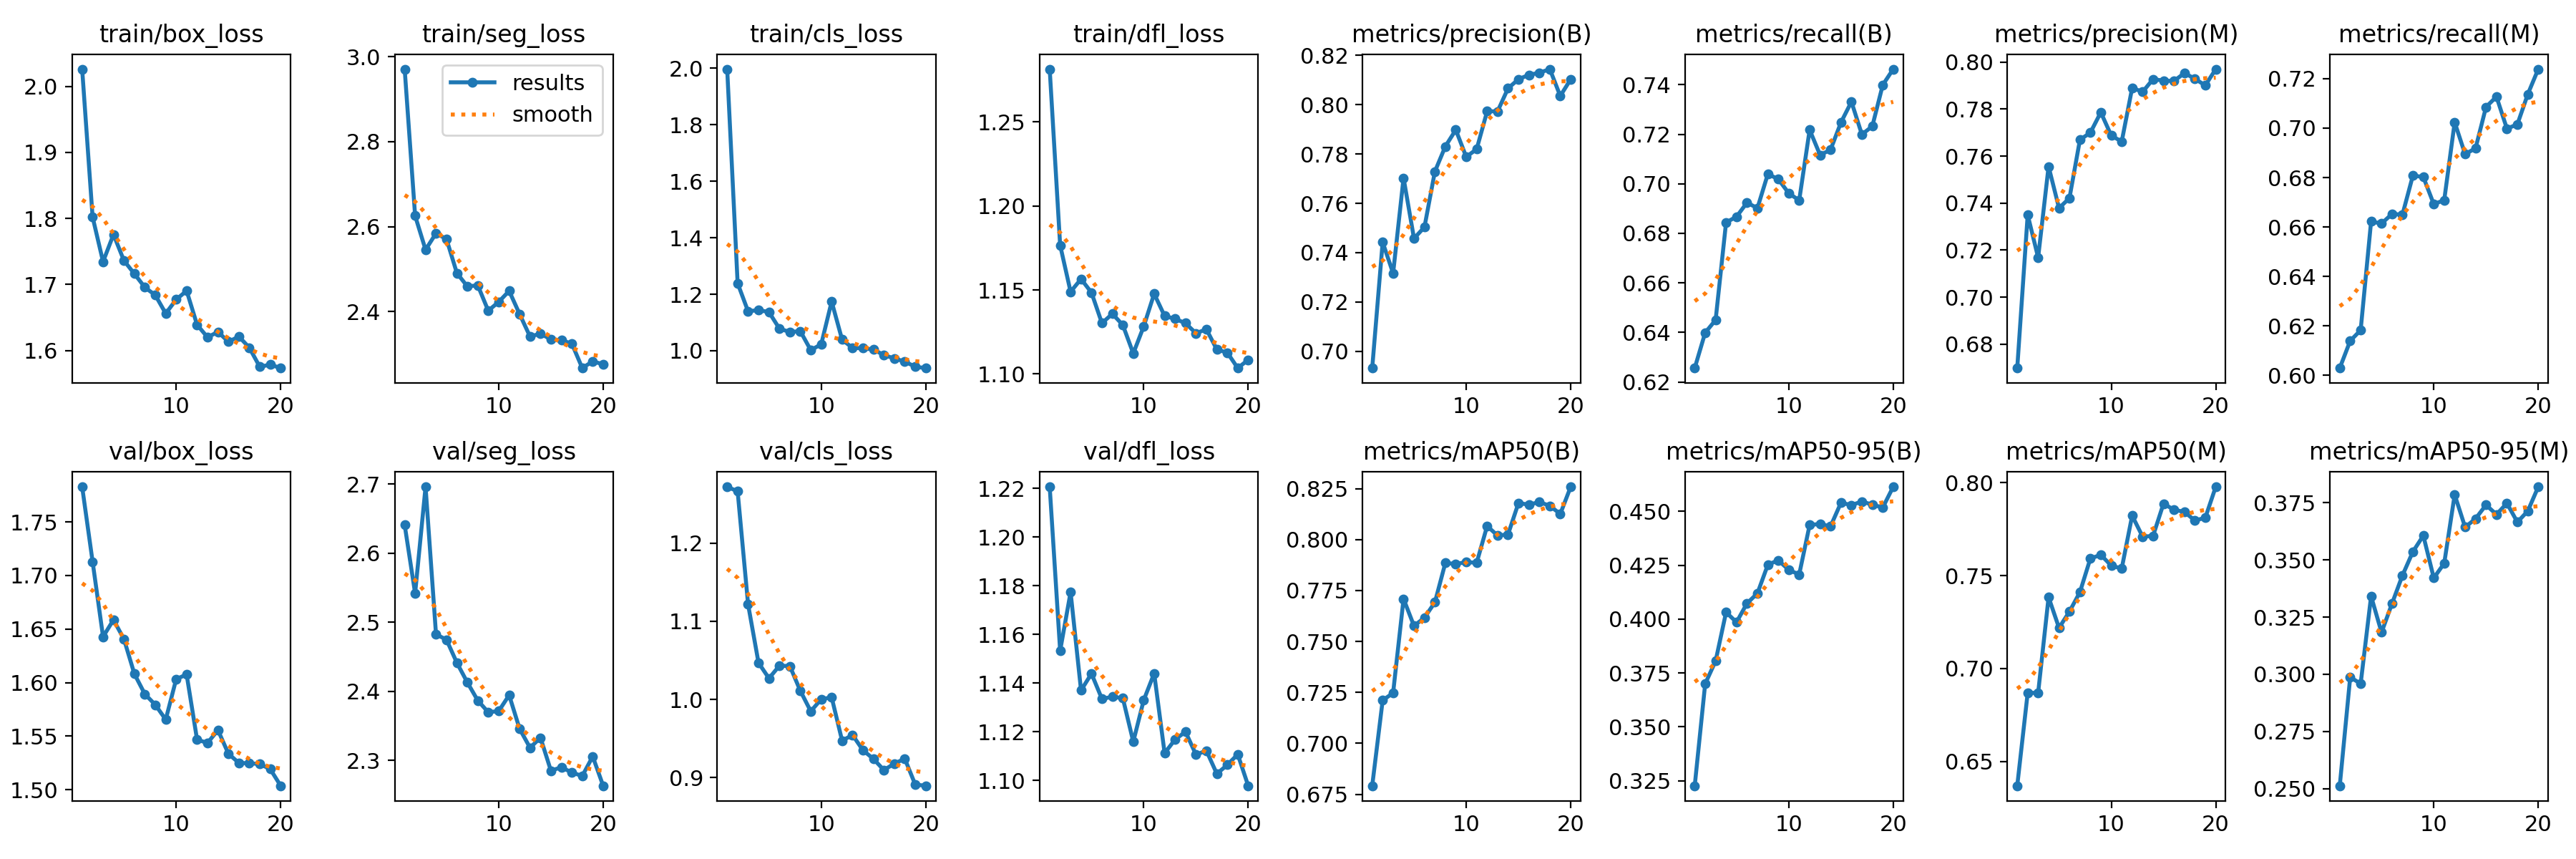

In [23]:
Image("/content/drive/MyDrive/Dataset/yolo_dataset/results/50_epochs-2/results.png")

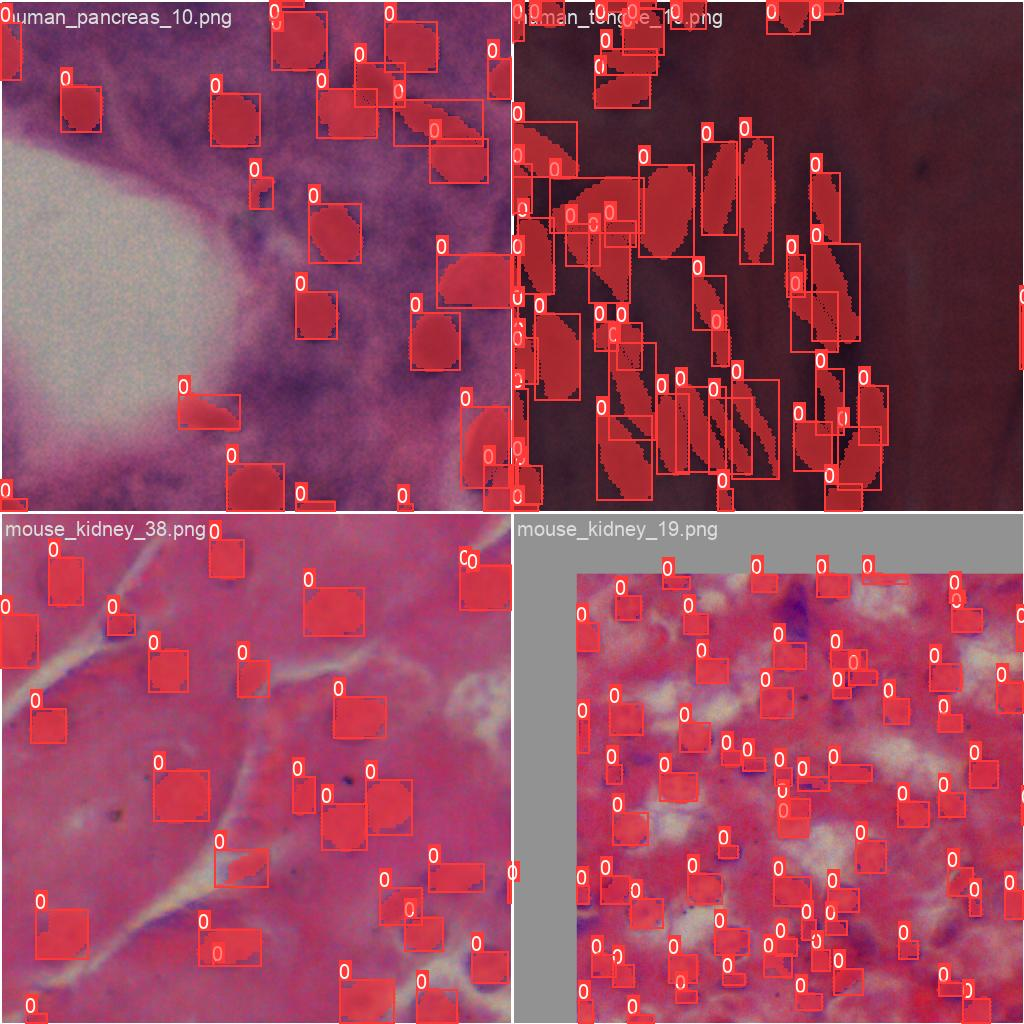

In [26]:
Image(filename='/content/drive/MyDrive/Dataset/yolo_dataset/results/50_epochs-2/train_batch1332.jpg', width=900)

In [28]:
#List the saved models in 'runs' directory. Note that you will see multiple 'train' subdirectories numbered 1, 2, 3, etc. The exact number depends on the number of epochs.
%ls /content/drive/MyDrive/Dataset/yolo_dataset/results/50_epochs-2/weights

best.pt  last.pt


In [29]:
my_new_model = YOLO('//content/drive/MyDrive/Dataset/yolo_dataset/results/50_epochs-2/weights/last.pt')

In [32]:
new_image = '/content/drive/MyDrive/Dataset/yolo_dataset/test/images/human_melanoma_08.png'
new_results = my_new_model.predict(new_image, conf=0.5) #Adjust conf threshold


image 1/1 /content/drive/MyDrive/Dataset/yolo_dataset/test/images/human_melanoma_08.png: 512x512 31 Nucleis, 150.4ms
Speed: 2.6ms preprocess, 150.4ms inference, 47.7ms postprocess per image at shape (1, 3, 512, 512)


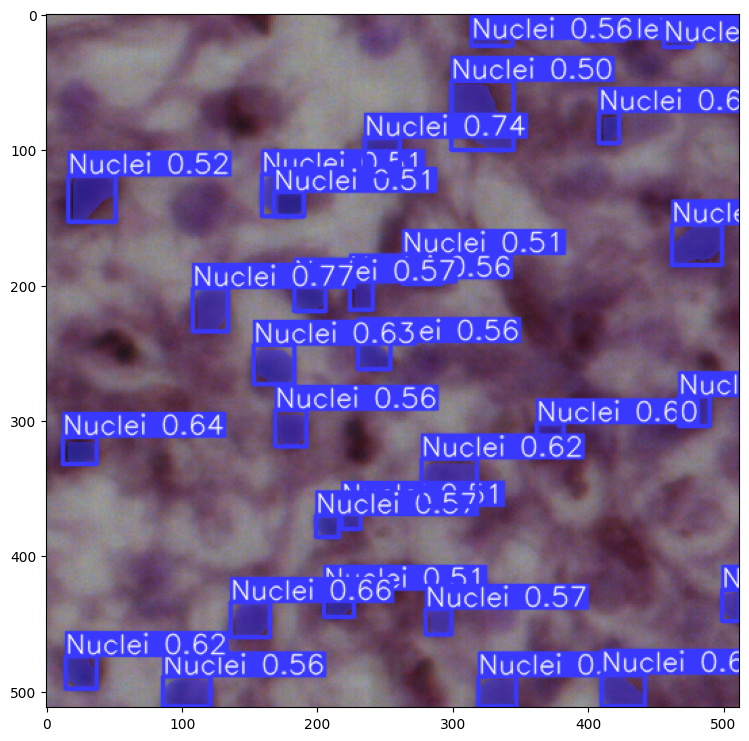

In [34]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(9, 9))
plt.imshow(new_result_array)